In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression , Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore') 


In [2]:
diabetes_data = pd.read_csv('../dataset/diabetes.csv') 
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## check missing values 

In [5]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### check duplicates

In [6]:
diabetes_data.duplicated().sum()

np.int64(0)

### checkl and visulaize outliers 

In [7]:
num_column = diabetes_data.select_dtypes(include='number') .columns 

for col in diabetes_data.columns: 
    Q1 = diabetes_data[col].quantile(0.25)
    Q3 = diabetes_data[col].quantile(0.75) 
    iqr = Q3 - Q1  
    upper = Q3 + 1.5 * iqr 
    lower = Q1 - 1.5 * iqr 
    diabetes_data.loc[(diabetes_data[col] < lower) | (diabetes_data[col] > upper) , col] = np.nan 
    diabetes_data.dropna(axis = 0 , inplace=True) 
    diabetes_data.reset_index()




In [8]:
for col in diabetes_data.columns : 
    Q1 = diabetes_data[col].quantile(0.25)
    Q3 = diabetes_data[col].quantile(0.75) 
    iqr = Q3 - Q1  
    upper = Q3 + 1.5 * iqr 
    lower = Q1 - 1.5 * iqr 

    outliers = diabetes_data[(diabetes_data[col] < lower) | (diabetes_data[col] > upper) ] 

    print(f'number of outliers in {col} is {len(outliers[col])}') 
    

number of outliers in Pregnancies is 0
number of outliers in Glucose is 9
number of outliers in BloodPressure is 4
number of outliers in SkinThickness is 0
number of outliers in Insulin is 9
number of outliers in BMI is 2
number of outliers in DiabetesPedigreeFunction is 9
number of outliers in Age is 2
number of outliers in Outcome is 0


In [9]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetes_data.shape

(636, 9)

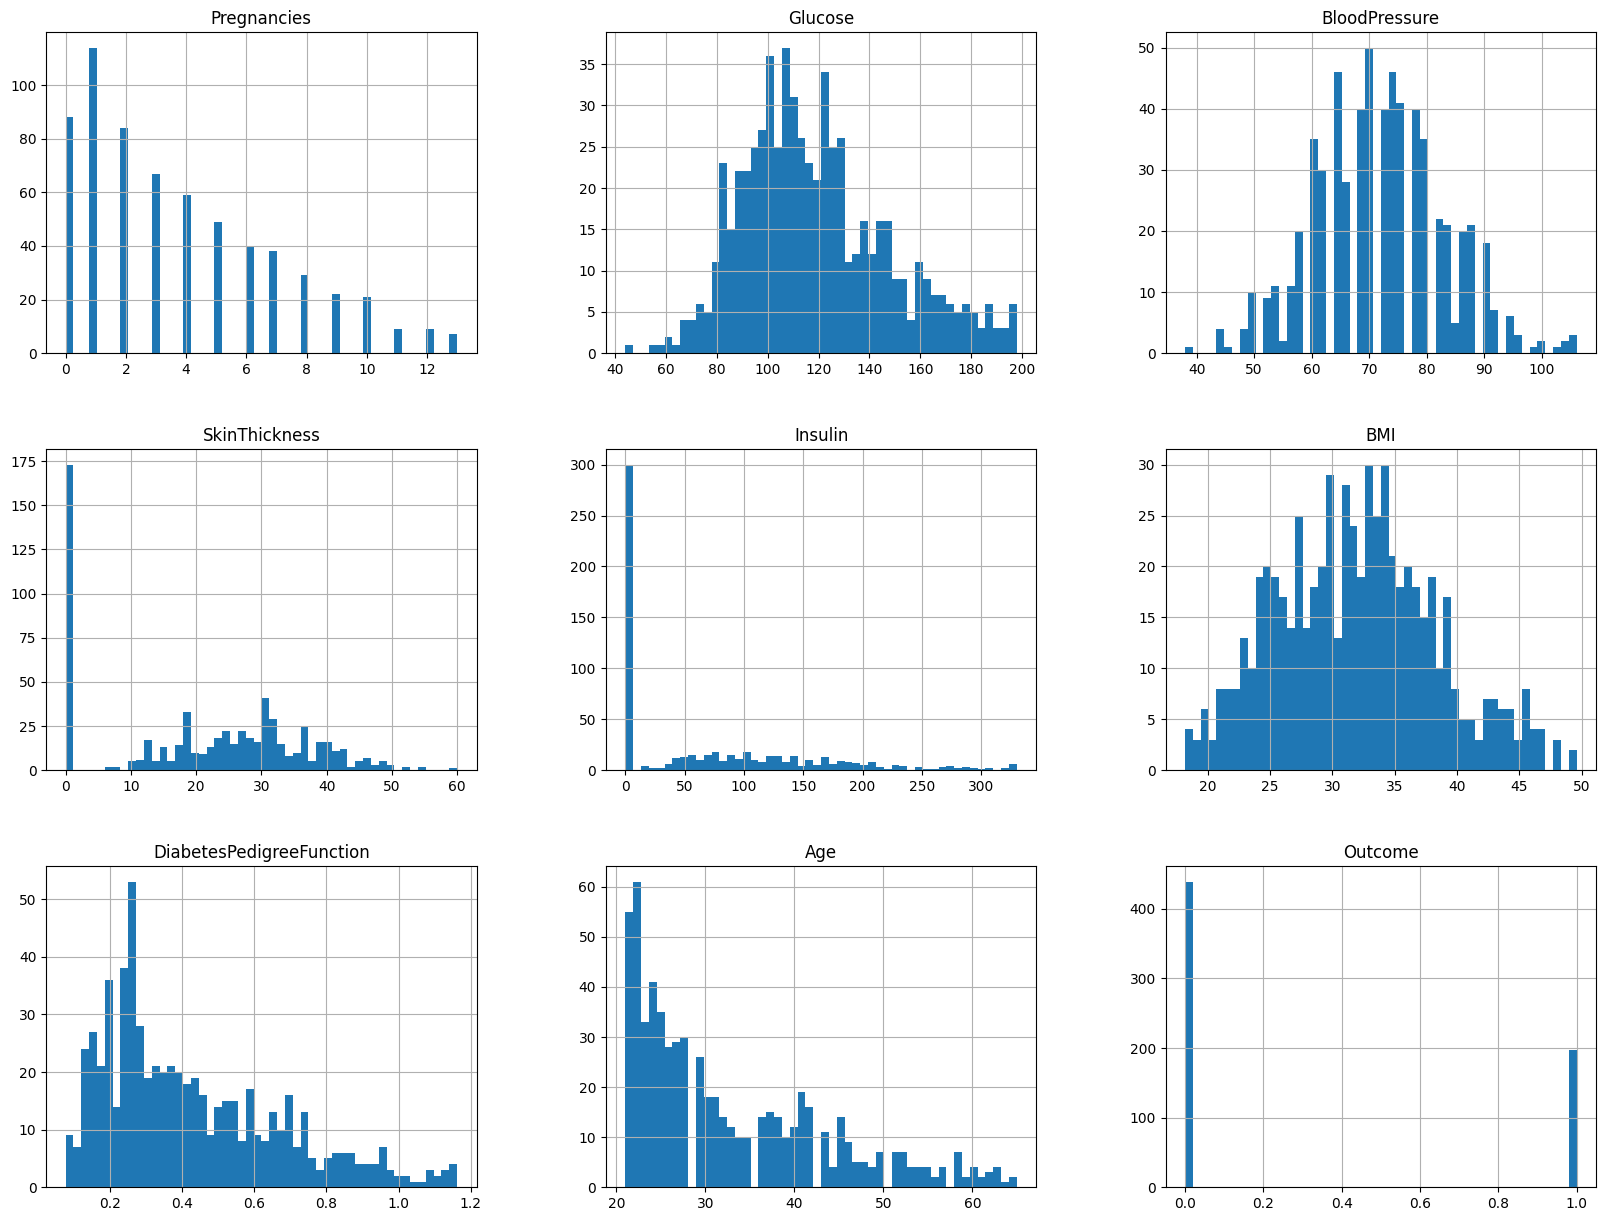

In [11]:

diabetes_data.hist(bins = 50 ,figsize=(20,15) ) 
plt.show()

# question 1 : How many patients have the diabetes versus don't have it?

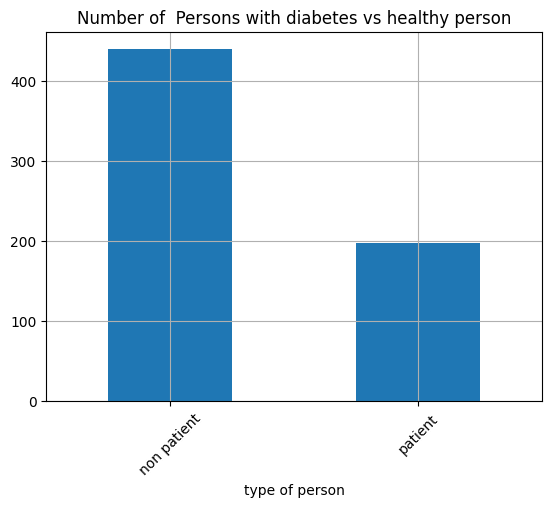

In [12]:
diabetes_data['Outcome'].value_counts().plot(kind='bar') 
plt.xlabel('type of person') 
plt.xticks( ticks=[0,1], labels = [ 'non patient', 'patient'], rotation = 45)
plt.grid(True)
plt.title('Number of  Persons with diabetes vs healthy person')
plt.show()

# correlation heatmap

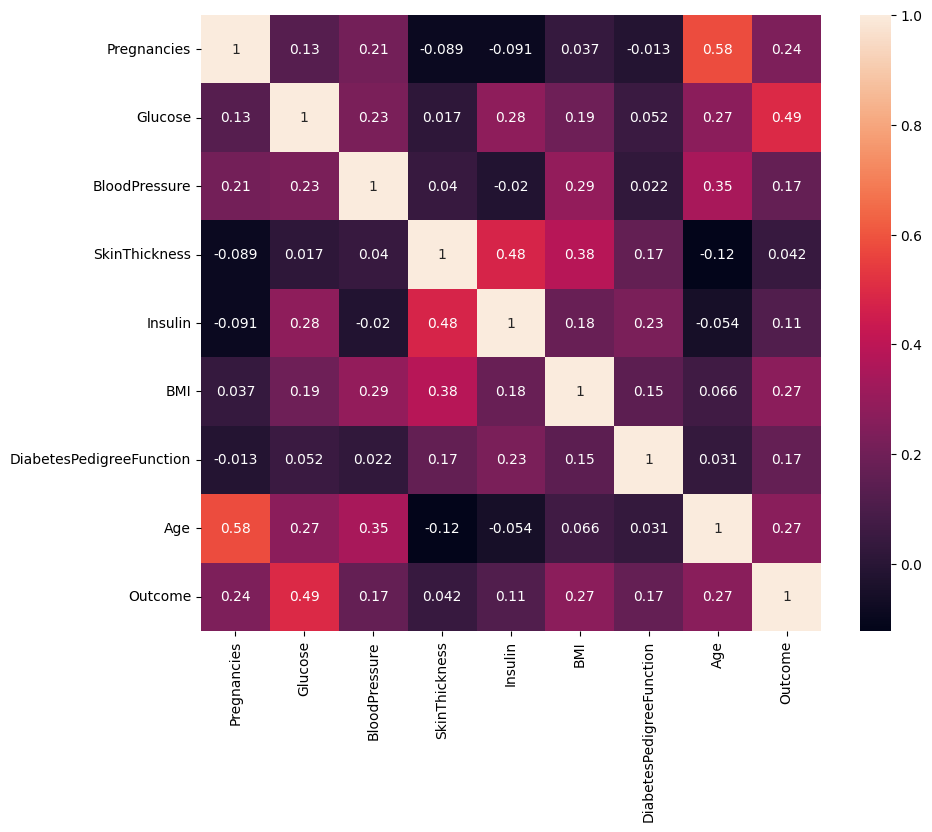

In [13]:
plt.figure(figsize=(10,8))
num_column = diabetes_data.select_dtypes(include='number').columns 
sns.heatmap(data= diabetes_data.corr(numeric_only=True) , annot=True) 
plt.show()

# pair plot of data

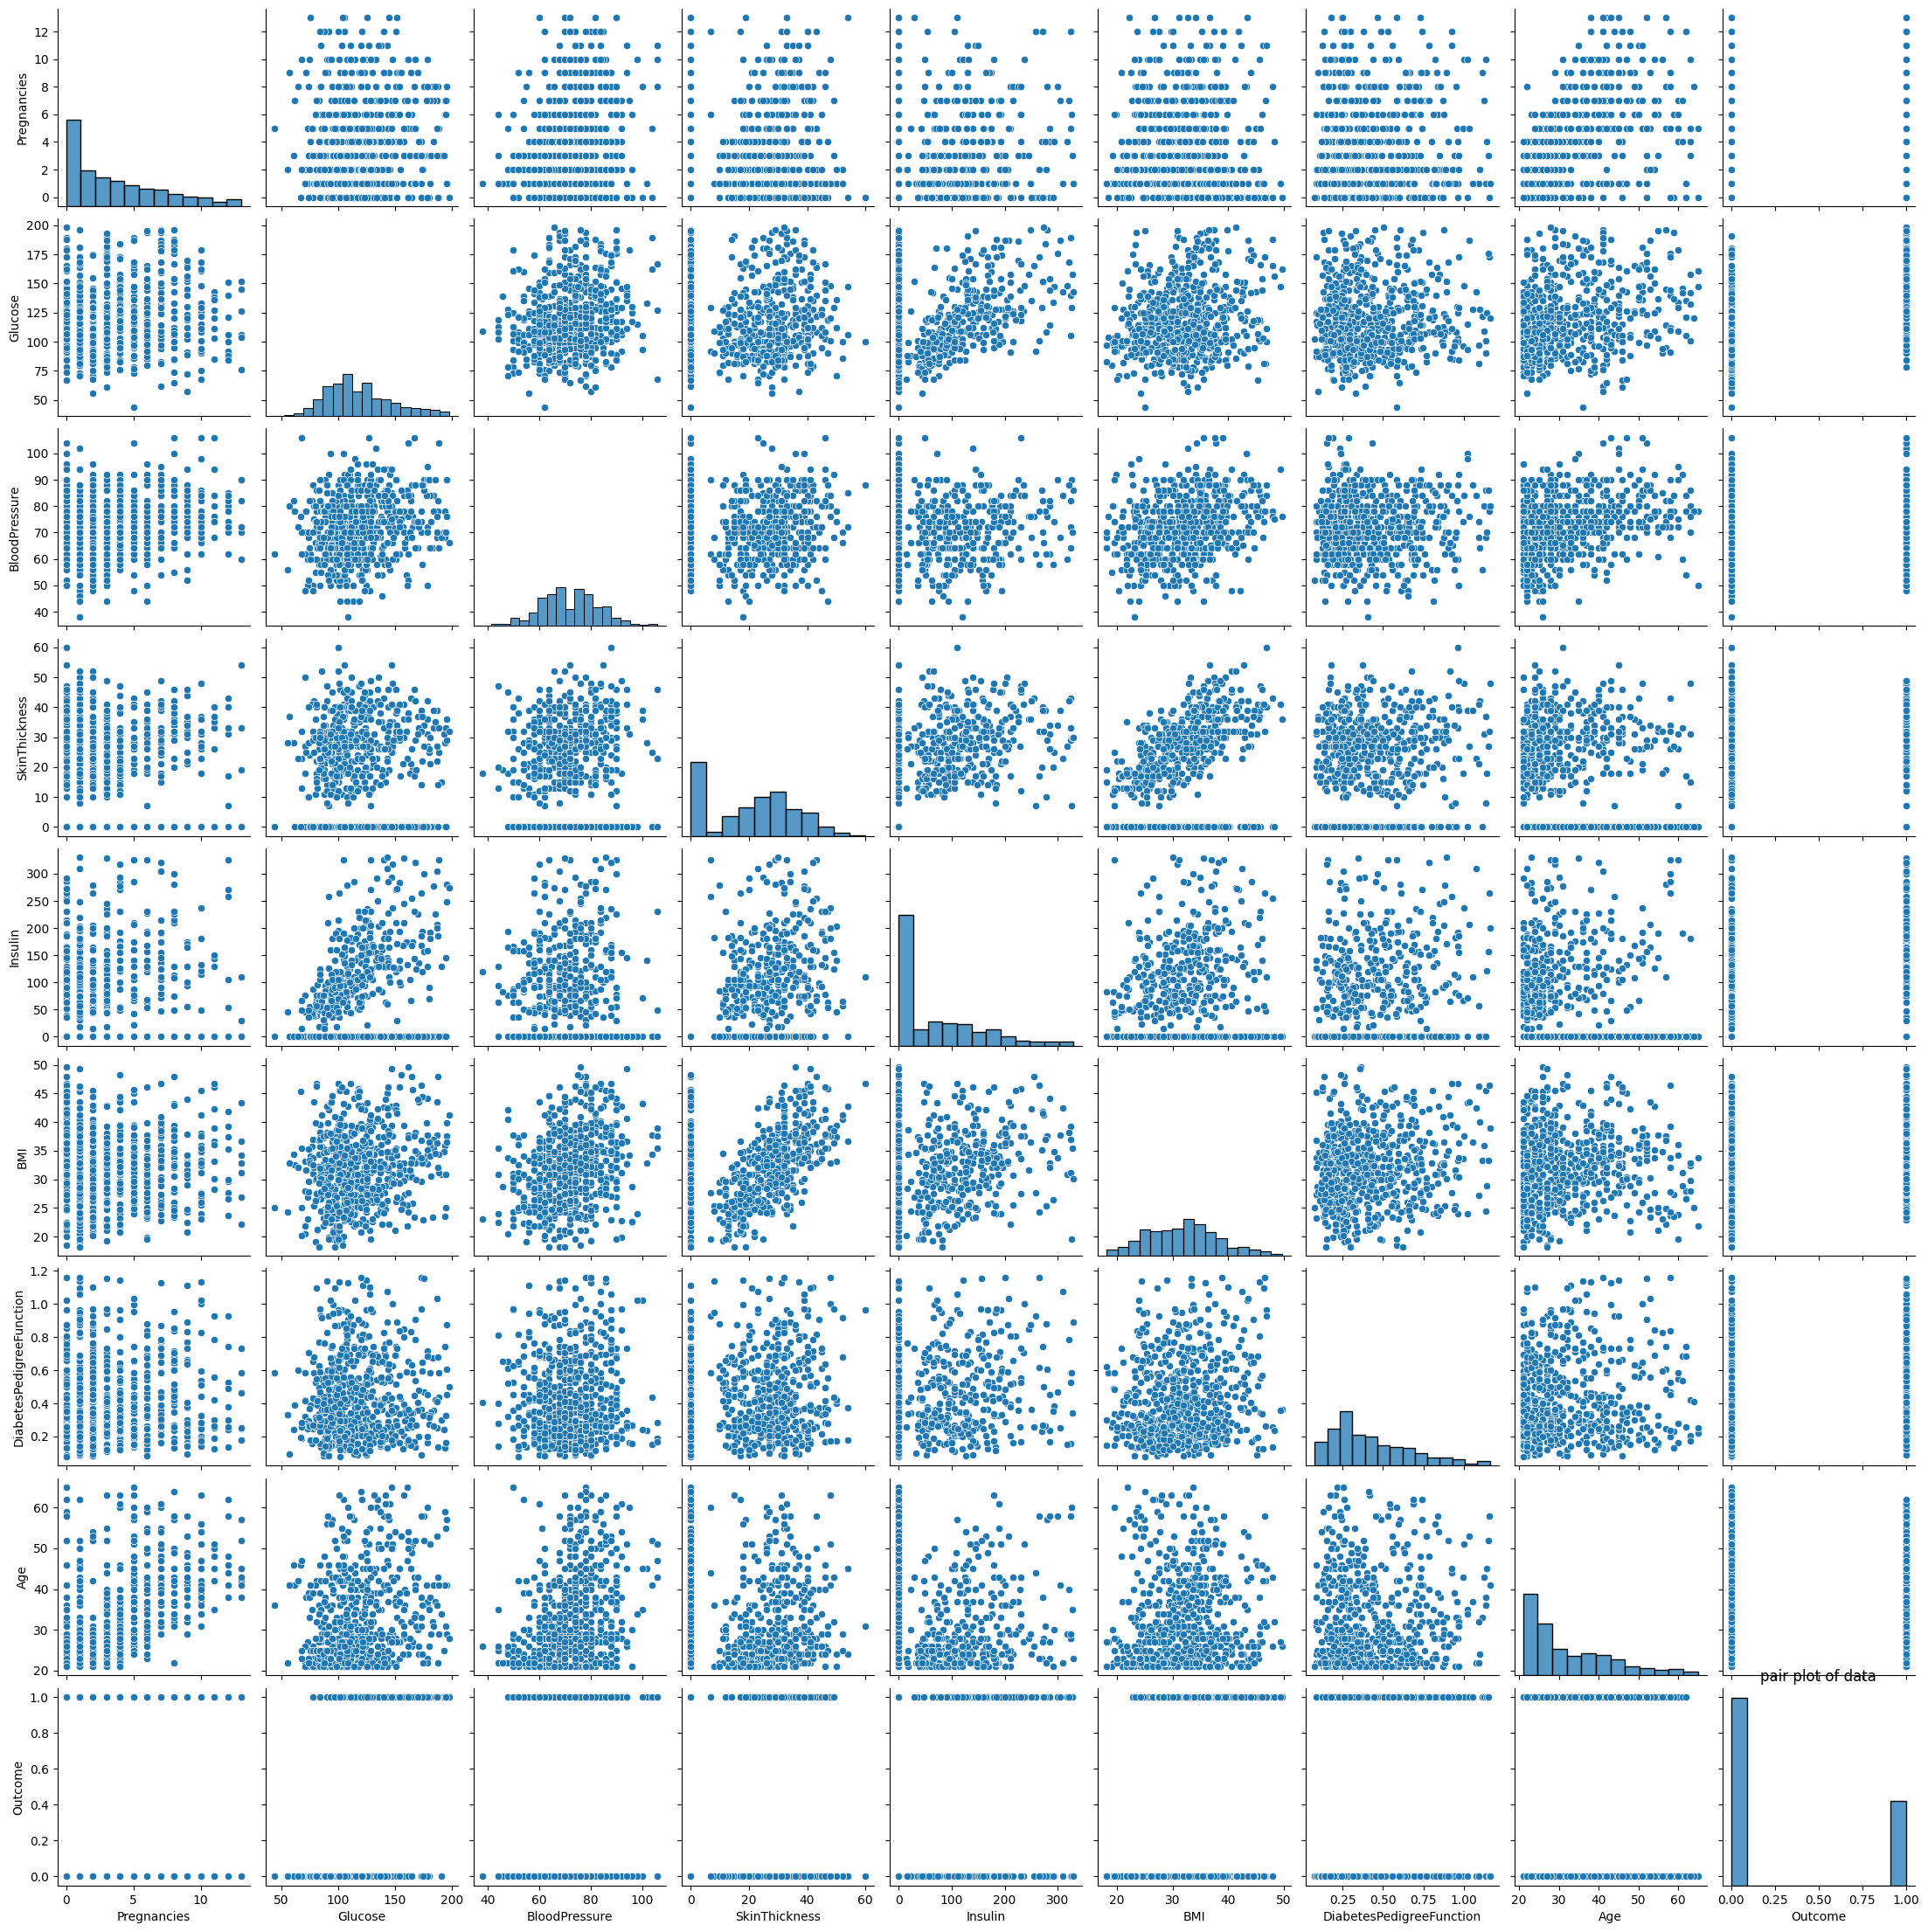

In [14]:
sns.pairplot(data=diabetes_data)
plt.title('pair plot of data')
plt.show()

In [15]:
diabetes_data['Glucose'].unique()

array([148.,  85., 183.,  89., 116.,  78., 110., 168., 166., 118., 107.,
       115., 126.,  99., 196., 119., 143., 125., 147.,  97., 145., 117.,
       109., 158.,  88.,  92., 122., 103., 138., 102.,  90., 180., 133.,
       106., 159., 146.,  71., 101., 176.,  73., 187., 100., 105.,  44.,
       141., 114.,  95., 139., 129.,  79.,  62., 112., 113.,  83.,  80.,
       123.,  81., 134., 142., 144.,  93., 151., 171.,  76., 160., 124.,
       111., 120., 173., 170.,  84.,  96., 128., 108., 154.,  57., 136.,
       188., 131., 104.,  75., 179., 130.,  87., 194., 162., 184., 140.,
        74., 181., 164.,  91.,  86., 191., 161.,  77., 150., 137., 155.,
       182., 152., 157., 165., 178.,  61., 189.,  98., 156.,  82., 193.,
        72.,  94., 135., 132., 195., 163.,  68., 127., 186., 198., 121.,
        67., 174., 167.,  56., 169., 149., 175.,  65.])

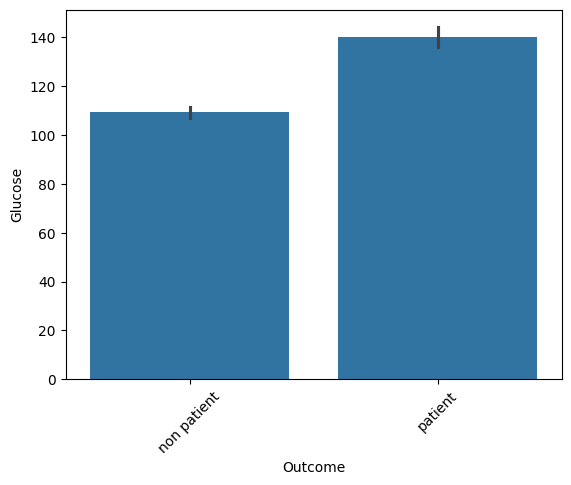

In [16]:
sns.barplot(data=diabetes_data , x = 'Outcome' , y = 'Glucose')
plt.xticks(ticks=[0, 1], labels=['non patient', 'patient'], rotation=45)
plt.show()

### now will split data in to features and target column 

In [17]:
X = diabetes_data.drop('Outcome' , axis=1)
y = diabetes_data['Outcome']

In [18]:
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0


In [20]:
# now will handel imbalanced data 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [21]:
features_col , target_col = smote.fit_resample(X ,y)

In [22]:
target_col.value_counts()

Outcome
1.0    439
0.0    439
Name: count, dtype: int64

In [23]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , shuffle=True)

In [24]:
print(x_train.shape)
print(y_train.shape)

(508, 8)
(508,)


In [25]:
print(x_test.shape)
print(y_test.shape)



(128, 8)
(128,)


# now will bulid models and train it 


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from catboost import CatBoostClassifier 
import lightgbm as lgb

In [27]:

# models = {
#     'Perceptron Model' : Perceptron(),
#     'LogisticRegression Model' : LogisticRegression(),
#     'SVC model' : SVC(),
#     'KNeighborsClassifier Model' : KNeighborsClassifier(),
#     'DecisionTreeClassifier Model' : DecisionTreeClassifier(),
#     'RandomForestClassifier Model' : RandomForestClassifier(),
#     'AdaBoostClassifier Model' : AdaBoostClassifier(),
#     'CatBoostClassifier Model' : CatBoostClassifier(),
#     'XGBClassifier Model' : XGBClassifier(),
#     'lightgbm Model' : lgb.LGBMClassifier() , 
#     'GradientBoostingClassifier model ':GradientBoostingClassifier(),
#     'BaggingClassifier model' : BaggingClassifier()
# }

In [28]:
models = [


    ('LogisticRegression Model' ,  LogisticRegression()),
    ('SVC model' , SVC()),
    ('KNeighborsClassifier Model' , KNeighborsClassifier() ),
    ('DecisionTreeClassifier Model' , DecisionTreeClassifier()),
    ('RandomForestClassifier Model' , RandomForestClassifier()),
    ('AdaBoostClassifier Model' , AdaBoostClassifier()),
    ('CatBoostClassifier Model' , CatBoostClassifier()),
    ('XGBClassifier Model' , XGBClassifier()),
    ('lightgbm Model' , lgb.LGBMClassifier()) , 
    ('GradientBoostingClassifier model ',GradientBoostingClassifier()),
    ('Perceptron Model'  ,  Perceptron()),
    ('BaggingClassifier model' , BaggingClassifier()) 
    
]

In [29]:
#visualize metrics of train,test of models 
from sklearn.metrics import classification_report , confusion_matrix 
def visualize_metrics(actual , predicted , title):
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_matrix(actual , predicted) , annot=True)
    plt.title('Confusion Metrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual') 
    plt.title(title)
    plt.show()

In [30]:
#Train the model, generate predictions, and evaluatethe model 
result = {} 
for name , model in models : 
    steps = [ 
        ('scaler' , StandardScaler()) ,
        (f'{name}' , model ) 
    ]
    pipe = Pipeline(steps= steps)
    print(f"\n--- Training & evaluating: {name} ---")
    pipe.fit(x_train, y_train)            # train
    y_pred = pipe.predict(x_test)         # <-- مهم: X_test مش y_test
    result[name] = (y_test , y_pred) 

    


--- Training & evaluating: LogisticRegression Model ---

--- Training & evaluating: SVC model ---

--- Training & evaluating: KNeighborsClassifier Model ---

--- Training & evaluating: DecisionTreeClassifier Model ---

--- Training & evaluating: RandomForestClassifier Model ---

--- Training & evaluating: AdaBoostClassifier Model ---

--- Training & evaluating: CatBoostClassifier Model ---
Learning rate set to 0.007715
0:	learn: 0.6881149	total: 152ms	remaining: 2m 31s
1:	learn: 0.6848742	total: 154ms	remaining: 1m 16s
2:	learn: 0.6805248	total: 156ms	remaining: 51.9s
3:	learn: 0.6760351	total: 158ms	remaining: 39.3s
4:	learn: 0.6719299	total: 160ms	remaining: 31.8s
5:	learn: 0.6668468	total: 162ms	remaining: 26.8s
6:	learn: 0.6628234	total: 164ms	remaining: 23.2s
7:	learn: 0.6590907	total: 166ms	remaining: 20.5s
8:	learn: 0.6552230	total: 167ms	remaining: 18.4s
9:	learn: 0.6507687	total: 169ms	remaining: 16.7s
10:	learn: 0.6467175	total: 171ms	remaining: 15.4s
11:	learn: 0.6433784	to

In [31]:
print(len(result))

12


In [32]:
print(result.keys())

dict_keys(['LogisticRegression Model', 'SVC model', 'KNeighborsClassifier Model', 'DecisionTreeClassifier Model', 'RandomForestClassifier Model', 'AdaBoostClassifier Model', 'CatBoostClassifier Model', 'XGBClassifier Model', 'lightgbm Model', 'GradientBoostingClassifier model ', 'Perceptron Model', 'BaggingClassifier model'])


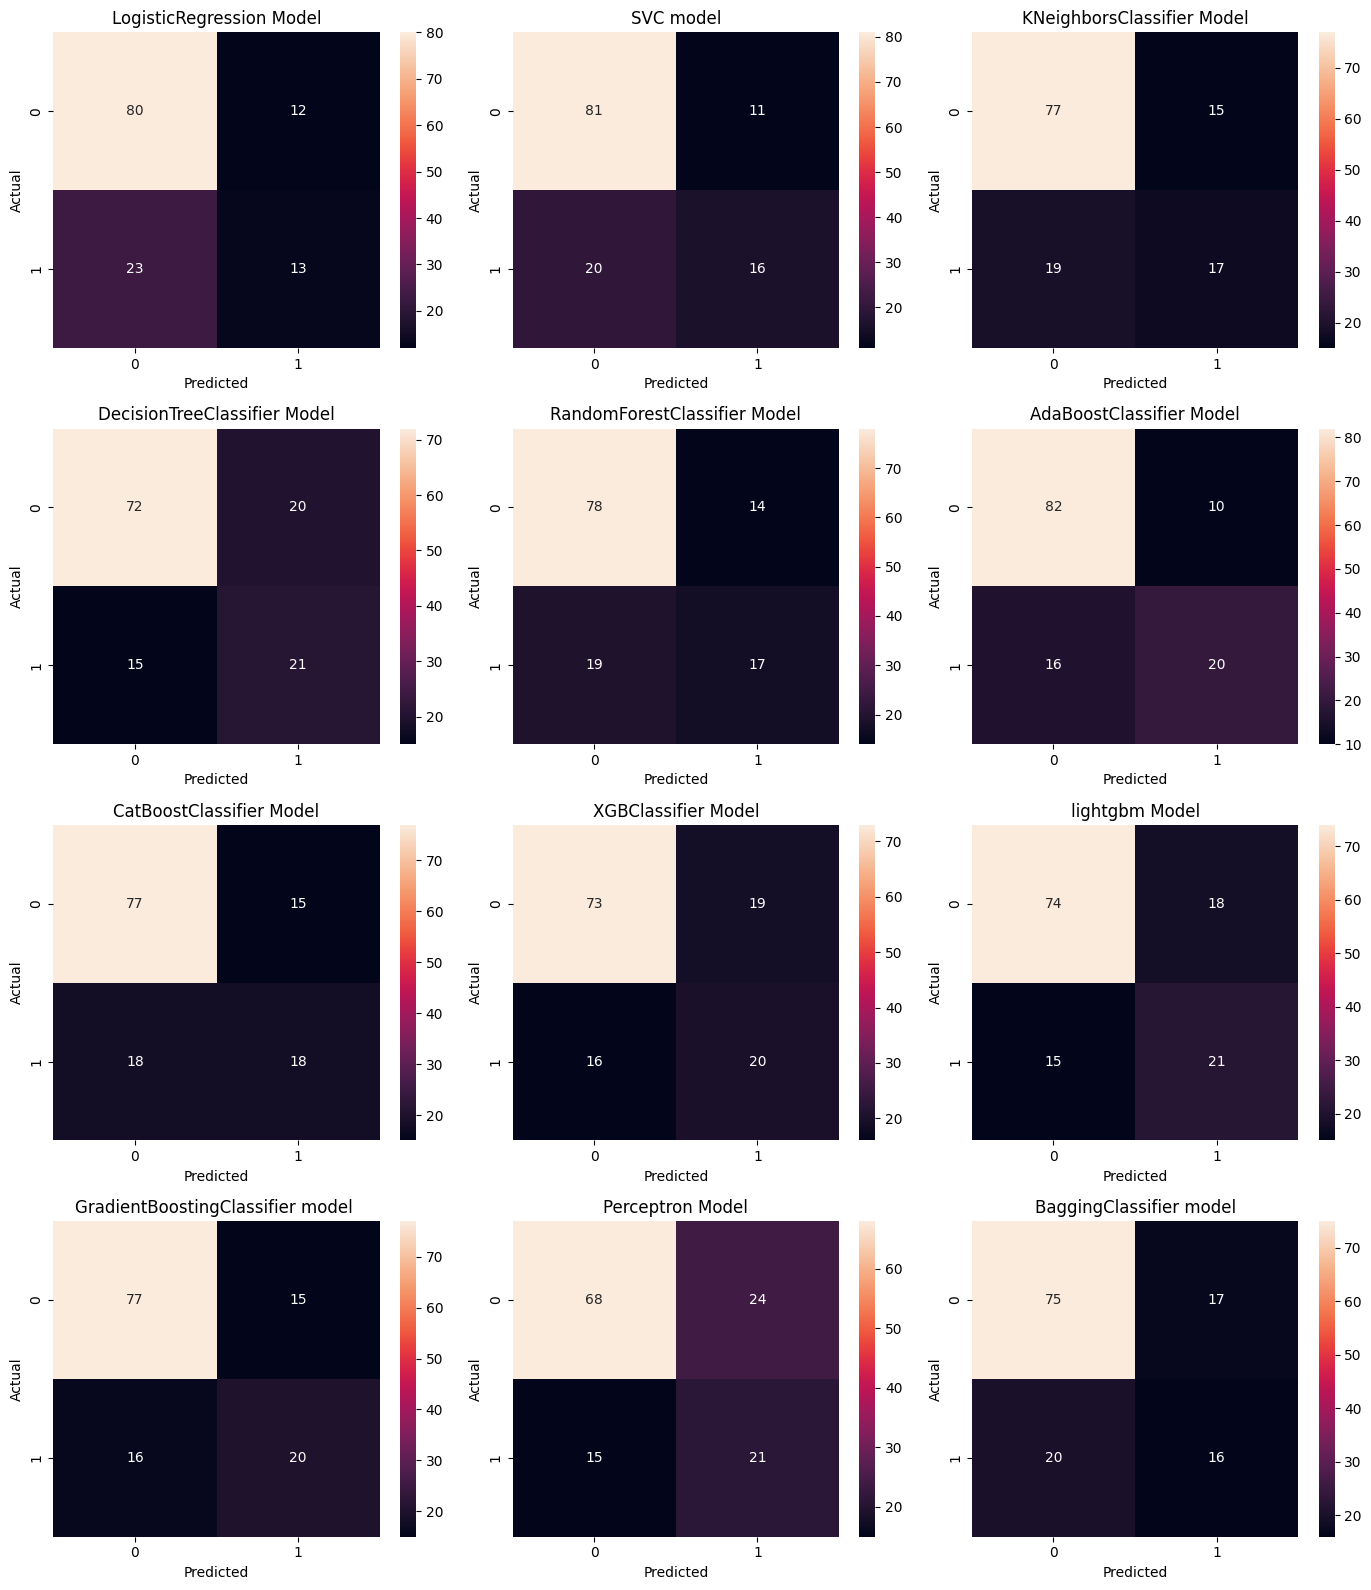

In [33]:
import math
fig_cols = 3
fig_rows = math.ceil(len(result) / fig_cols)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=(14, fig_rows * 4))
axs = axs.flatten()  # مهم جدًا

for i, (key, value) in enumerate(result.items()):
    actual, predicted = value

    sns.heatmap(
        confusion_matrix(actual, predicted),
        annot=True,
        ax=axs[i],
        fmt='d'
    )

    axs[i].set_title(key)
    axs[i].set_xlabel("Predicted")
    axs[i].set_ylabel("Actual")

# إخفاء أي axes فاضية
for j in range(i + 1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()


In [48]:
for i , (key , value) in enumerate(result.items()) : 
    actual , predicted = value 

    dict_report = classification_report(actual , predicted , output_dict=True) 
    # print(f' accuracy of {key} is {dict_report['Recall']}') 
    print(f'recall of {key} is {dict_report['macro avg']['recall']}')
      

recall of LogisticRegression Model is 0.6153381642512077
recall of SVC model is 0.66243961352657
recall of KNeighborsClassifier Model is 0.6545893719806763
recall of DecisionTreeClassifier Model is 0.6829710144927537
recall of RandomForestClassifier Model is 0.6600241545893719
recall of AdaBoostClassifier Model is 0.7234299516908212
recall of CatBoostClassifier Model is 0.6684782608695652
recall of XGBClassifier Model is 0.6745169082125604
recall of lightgbm Model is 0.693840579710145
recall of GradientBoostingClassifier model  is 0.6962560386473431
recall of Perceptron Model is 0.661231884057971
recall of BaggingClassifier model is 0.6298309178743962


In [56]:
#Hyperparameter tuning with RandomizedSearchCV , GridSearchCV
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
#Dict for all hyperparameters of models we try 
models_with_params = {
    'Decision Tree Model' : {
        'model' : DecisionTreeClassifier() ,
        'params' : {
            'criterion' : ['gini' ,'entropy' ,'log_loss'],
            'max_depth' : [None ,3,5,10,20],
            'min_samples_split' : [2,5,10],
            'min_samples_leaf' : [1,2,5,10]
        }
    },

    'Random Forest Model' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [50 ,100 ,200 ,500] ,
            'max_depth' : [None ,3,5,10,20] ,
            'criterion' : ['gini' ,'entropy' ,'log_loss'],
            'min_samples_split' : [2,5,10],
            'max_features' : ['sqrt' ,'log2' ,None] 
        }
    },

    'catboost Model' : {
        'model' : CatBoostClassifier() ,
        'params' : {
            "iterations": [200, 500, 800, 1000],
            "learning_rate": [0.001, 0.01, 0.05, 0.1],
            "depth": [4, 6, 8, 10],
            "l2_leaf_reg": [1, 3, 5, 7, 9],
            "bagging_temperature": [0, 0.5, 1, 2],
            "border_count": [32, 64, 128, 254],
        }
    },

    'XGBoost Model' : {
        'model' : XGBClassifier() ,
        'params' : {
            'n_estimators': [100, 200, 500],
            'max_depth': [3, 5, 7, 10],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.5, 0.7, 1],
            'colsample_bytree': [0.5, 0.7, 1],
        }
    },

    'Ada Boost Classifier' : {
        'model' : AdaBoostClassifier() ,
        'params' : {
            "n_estimators": [50, 100, 200, 300, 500],
            "learning_rate": [0.001, 0.01, 0.1, 0.3, 1.0],
            "algorithm": ["SAMME", "SAMME.R"]
        }
    } , 

    'GradientBoostingClassifier' : {
        'model' : GradientBoostingClassifier() , 
        'params' : {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
            "max_depth": [2, 3, 4, 5],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "subsample": [0.6, 0.8, 1.0],
            "max_features": ["sqrt", "log2", None]
        }
    }

}

In [57]:
scores = []
for model_name , model_params in models_with_params.items() :
    random_search = RandomizedSearchCV(model_params['model'] , model_params['params'] , cv=5 , n_jobs=-1 , scoring='accuracy' , n_iter=4 , return_train_score=False , random_state=42)
    random_search.fit(x_train ,y_train)

    scores.append({
        'model' : model_name ,
        'best_score' : random_search.best_score_ ,
        'best_params' : random_search.best_params_
    })

hyperparams_result = pd.DataFrame(scores , columns=['model' , 'best_score' , 'best_params'])
hyperparams_result

0:	learn: 0.6924798	total: 33.6ms	remaining: 6.68s
1:	learn: 0.6918024	total: 57.7ms	remaining: 5.71s
2:	learn: 0.6912264	total: 85.5ms	remaining: 5.62s
3:	learn: 0.6905368	total: 114ms	remaining: 5.59s
4:	learn: 0.6899167	total: 141ms	remaining: 5.48s
5:	learn: 0.6894148	total: 166ms	remaining: 5.36s
6:	learn: 0.6889224	total: 190ms	remaining: 5.25s
7:	learn: 0.6882917	total: 217ms	remaining: 5.2s
8:	learn: 0.6877224	total: 240ms	remaining: 5.1s
9:	learn: 0.6871375	total: 268ms	remaining: 5.09s
10:	learn: 0.6865693	total: 298ms	remaining: 5.13s
11:	learn: 0.6859726	total: 332ms	remaining: 5.2s
12:	learn: 0.6854611	total: 364ms	remaining: 5.24s
13:	learn: 0.6849099	total: 366ms	remaining: 4.87s
14:	learn: 0.6843362	total: 394ms	remaining: 4.86s
15:	learn: 0.6837352	total: 423ms	remaining: 4.87s
16:	learn: 0.6832200	total: 451ms	remaining: 4.86s
17:	learn: 0.6826752	total: 479ms	remaining: 4.84s
18:	learn: 0.6821449	total: 513ms	remaining: 4.89s
19:	learn: 0.6815842	total: 547ms	remaini

,model,best_score,best_params
0,Decision Tree Model,0.793225,"{'min_samples_split': 2, 'min_samples_leaf': 1..."
1,Random Forest Model,0.787401,"{'n_estimators': 500, 'min_samples_split': 2, ..."
2,catboost Model,0.785479,"{'learning_rate': 0.001, 'l2_leaf_reg': 7, 'it..."
3,XGBoost Model,0.779519,"{'subsample': 0.5, 'n_estimators': 100, 'max_d..."
4,Ada Boost Classifier,0.787420,"{'n_estimators': 300, 'learning_rate': 0.1, 'a..."
5,GradientBoostingClassifier,0.775500,"{'subsample': 1.0, 'n_estimators': 100, 'min_s..."


In [70]:
print(hyperparams_result['best_params'].loc[0])

{'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'log_loss'}


In [71]:
model = DecisionTreeClassifier(min_samples_split= 2 , min_samples_leaf=10 , max_depth= 5 ,criterion='log_loss' ) 

model.fit(x_train , y_train) 


,criterion,'log_loss'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [72]:
y_pred = model.predict(x_test) 
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        92
         1.0       0.57      0.47      0.52        36

    accuracy                           0.75       128
   macro avg       0.69      0.67      0.67       128
weighted avg       0.74      0.75      0.74       128



In [73]:
#save the model
import joblib 
joblib.dump(model , 'Diabetes_CB_Model.pkl')

['Diabetes_CB_Model.pkl']